In [1]:
%matplotlib inline
import pandas as pd

In [2]:
# Reading csv file
mortality_rates = pd.read_csv('data/mortality')
mortality_rates.shape

(5044, 5)

In [3]:
mortality_rates.head()

,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births)
0,Afghanistan,2015,66.3 [52.7-83.9],35.5 [19.2-56.4],91.1 [69.6-118.8]
1,Afghanistan,2014,68.1 [55.7-83.6],36.1 [19.5-57.5],93.9 [74.5-118.3]
2,Afghanistan,2013,69.9 [58.7-83.5],36.8 [20.1-58.6],96.7 [79.1-118.2]
3,Afghanistan,2012,71.7 [61.6-83.7],37.4 [20.4-60.0],99.5 [83.8-118.5]
4,Afghanistan,2011,73.4 [64.4-84.2],38.1 [20.7-61.0],102.3 [88.1-119.3]


In [4]:
mortality_rates.tail()

,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births)
5039,Zimbabwe,1994,58.1 [54.5-62.0],20.4 [18.3-23.0],91.2 [84.3-98.6]
5040,Zimbabwe,1993,56.4 [52.9-60.0],20.5 [18.4-23.1],87.0 [80.4-93.9]
5041,Zimbabwe,1992,54.5 [51.0-58.0],20.8 [18.6-23.4],82.7 [76.3-89.3]
5042,Zimbabwe,1991,52.6 [49.2-56.1],21.3 [19.0-23.8],78.8 [72.5-85.2]
5043,Zimbabwe,1990,51.2 [47.8-54.6],22.0 [19.5-24.4],75.8 [69.7-82.0]


In [5]:
mortality_rates = mortality_rates[['Country','Year','Under-five mortality rate (probability of dying by age 5 per 1000 live births)']]

In [6]:
# rename column_name
mortality_rates.rename(columns={'Under-five mortality rate (probability of dying by age 5 per 1000 live births)':'under5_m_rate'},inplace=True)

In [7]:
mortality_rates.head()

,Country,Year,under5_m_rate
0,Afghanistan,2015,91.1 [69.6-118.8]
1,Afghanistan,2014,93.9 [74.5-118.3]
2,Afghanistan,2013,96.7 [79.1-118.2]
3,Afghanistan,2012,99.5 [83.8-118.5]
4,Afghanistan,2011,102.3 [88.1-119.3]


In [8]:
mortality_rates.columns

Index(['Country', 'Year', 'under5_m_rate'], dtype='object')

In [9]:
mortality_rates['under5_m_rate'][0][0:4] # split under5_m_rate values to get percentage value

'91.1'

In [10]:
mortality_rates['under5_m_rate'][0].split(' ')[0]

'91.1'

In [11]:
# helper function to pre-process data
def slice_rates(rate):
    return float(rate.split(' ')[0])

In [12]:
# apply function on single column
mortality_rates['under5_m_rate']=mortality_rates['under5_m_rate'].apply(slice_rates)

In [13]:
mortality_rates.head()

,Country,Year,under5_m_rate
0,Afghanistan,2015,91.1
1,Afghanistan,2014,93.9
2,Afghanistan,2013,96.7
3,Afghanistan,2012,99.5
4,Afghanistan,2011,102.3


In [14]:
mortality_rates.shape

(5044, 3)

In [15]:
mortality_rates.describe()

,Year,under5_m_rate
count,5044.000000,5044.000000
mean,2002.500000,52.237550
std,7.500744,55.236709
min,1990.000000,1.900000
25%,1996.000000,11.900000
50%,2002.500000,28.300000
75%,2009.000000,78.300000
max,2015.000000,328.200000


In [16]:
mortality_rates[mortality_rates['Year'] == 1990].sort_values(by = 'under5_m_rate')[:5] # sort according to particular column

,Country,Year,under5_m_rate
2235,Japan,1990,6.3
2001,Iceland,1990,6.4
1585,Finland,1990,6.7
4341,Sweden,1990,6.9
3613,Republic of Korea,1990,7.1


In [17]:
def yearly_data(year):
    
    """
    returns country-wise mortality rate in ascending order for given year
    """
    
    m_rates = mortality_rates[mortality_rates['Year']==year].copy()
    # slicing for the given year
    m_rates.drop('Year',axis=1,inplace=True)
    # dropping the column which is now irrelevant
    m_rates.set_index('Country',inplace=True)
    # setting the index to country for ease
    return m_rates.sort_values(by = 'under5_m_rate')
    # returning sorted data

In [18]:
# apply above function
m_rates_1990 = yearly_data(1990)

In [19]:
m_rates_1990.head(10) # Top 10 countries with best mortality rate in 1990

,under5_m_rate
Country,
Japan,6.3
Iceland,6.4
Finland,6.7
Sweden,6.9
Republic of Korea,7.1
Singapore,7.7
Monaco,7.8
Switzerland,8.2
Canada,8.3


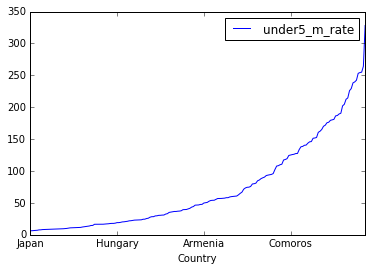

In [20]:
m_rates_1990.plot()

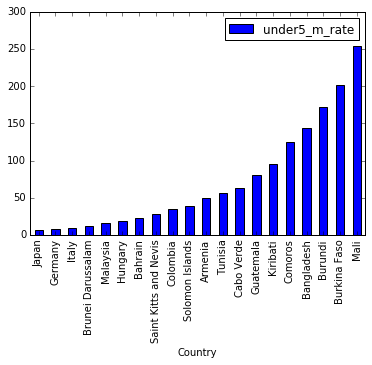

In [21]:
m_rates_1990.iloc[::10,:].plot.bar()

In [22]:
def country_data(country):
    
    country_df = mortality_rates[mortality_rates['Country'] == country].copy()
    # slicing data for the particular country
    country_df.drop('Country',axis=1,inplace=True)
    # dropping the country column is now irrelevant
    country_df.set_index('Year',inplace=True)
    # setting the index as year to facilitate easier merge operations
    country_df.columns = [country]
    # setting the name of coumn to country name
    return country_df

In [23]:
sweden_data = country_data('Sweden')
india_data = country_data('India')
mali_data = country_data('Mali')

In [24]:
india_data.head()

,India
Year,
2015,47.7
2014,49.8
2013,52.1
2012,54.5
2011,57.2


In [25]:
sweden_data.head()

,Sweden
Year,
2015,3
2014,3
2013,3
2012,3
2011,3


In [26]:
# Merge data for three countries in a single dataframe
india_sweden = india_data.merge(sweden_data,left_index=True,right_index=True)
three_countries = india_sweden.merge(mali_data,left_index=True,right_index=True)

In [27]:
three_countries.head(10)

,India,Sweden,Mali
Year,,,
2015,47.7,3.0,114.7
2014,49.8,3.0,118.3
2013,52.1,3.0,122.7
2012,54.5,3.0,127.0
2011,57.2,3.0,131.7
2010,59.9,3.1,136.6
2009,62.7,3.1,142.0
2008,65.6,3.2,148.3
2007,68.5,3.3,155.1


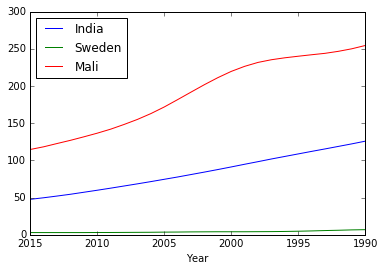

In [28]:
three_countries.plot()

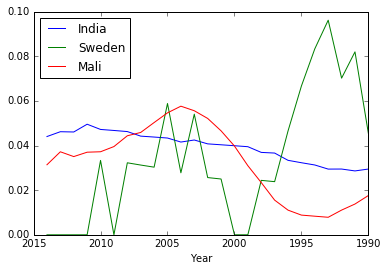

In [29]:
three_countries.pct_change().plot()

In [32]:
world_mortality_rates = pd.Series() # Initialising an empty series
for year,group in mortality_rates.groupby('Year'):
    world_mortality_rates = world_mortality_rates.append(group['under5_m_rate'].mean(),index=[year])


TypeError: append() got an unexpected keyword argument 'index'